In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
seaborn.set()

In [72]:
with open('../input/Accidents0515.csv', 'r') as f:
    accident = pd.read_csv(f,encoding='utf-8')

In [73]:
accident.columns

Index([u'﻿Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location'],
      dtype='object')

In [76]:
acc.columns[0]

'\xef\xbb\xbfAccident_Index'

In [77]:
acc['Accident_Severity'].unique()

array([2, 3, 1])

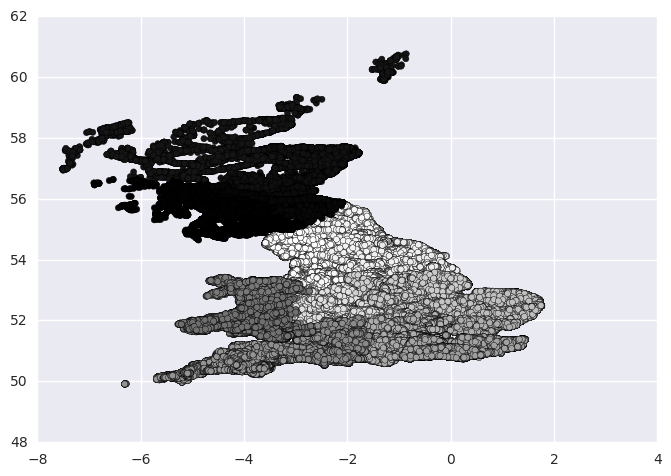

In [16]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Police_Force)

Diiffrent Police_Force distribution. 

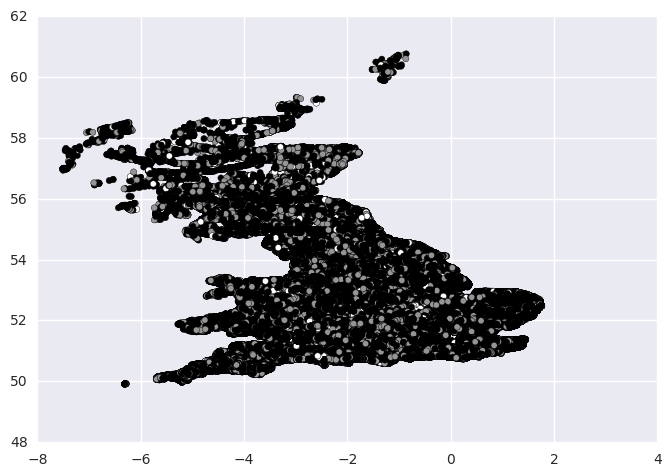

In [17]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Accident_Severity)

In [83]:
acc2 = acc.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
               '\xef\xbb\xbfAccident_Index', 'Police_Force', 'Local_Authority_(District)',
               'Local_Authority_(Highway)', 'LSOA_of_Accident_Location',
               'Did_Police_Officer_Attend_Scene_of_Accident',
               '1st_Road_Number', '2nd_Road_Number' ],axis = 1)

In [90]:
acc2.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,2,1,1,04/01/2005,3,17:42,3,6,30,0,-1,-1,0,1,1,2,2,0,0,1
1,3,1,1,05/01/2005,4,17:36,4,3,30,6,2,5,0,5,4,1,1,0,0,1
2,3,2,1,06/01/2005,5,00:15,5,6,30,0,-1,-1,0,0,4,1,1,0,0,1
3,3,1,1,07/01/2005,6,10:35,3,6,30,0,-1,-1,0,0,1,1,1,0,0,1
4,3,1,1,10/01/2005,2,21:13,6,6,30,0,-1,-1,0,0,7,1,2,0,0,1


In [87]:
acc_count = acc2.groupby(acc2.Accident_Severity).Accident_Severity.count()

In [88]:
acc_count

Accident_Severity
1      22998
2     242080
3    1515575
Name: Accident_Severity, dtype: int64

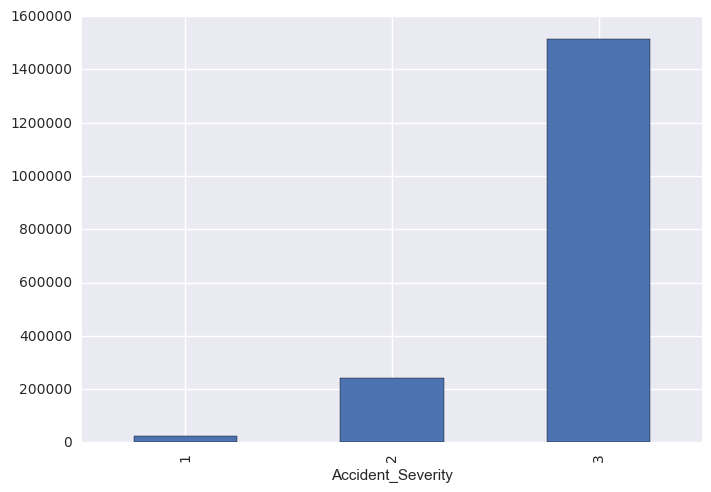

In [89]:
acc_count.plot(kind = 'bar')

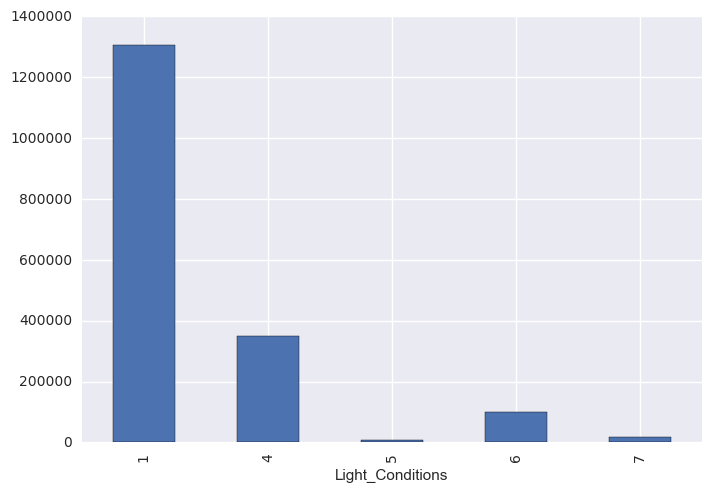

In [92]:
acc_count = acc2.groupby(acc2.Light_Conditions).Accident_Severity.count().plot(kind = 'bar')

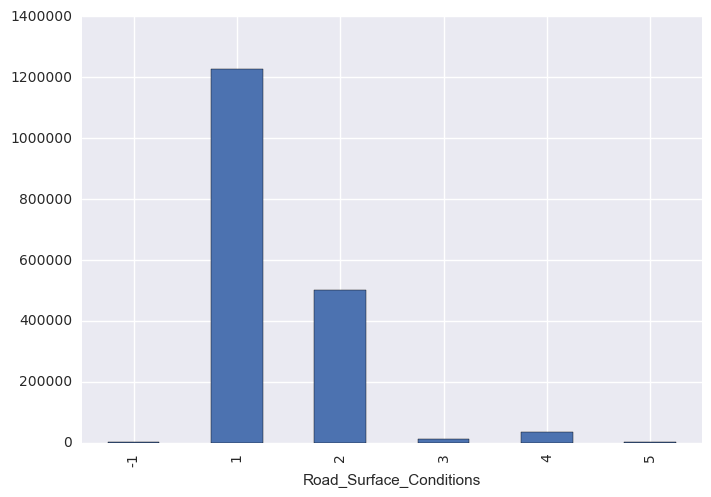

In [93]:
acc_count = acc2.groupby(acc2.Road_Surface_Conditions).Accident_Severity.count().plot(kind = 'bar')

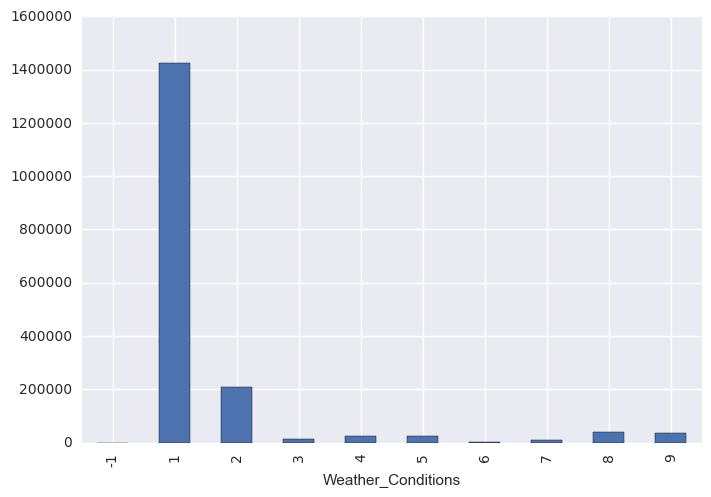

In [94]:
acc_count = acc2.groupby(acc2.Weather_Conditions).Accident_Severity.count().plot(kind = 'bar')

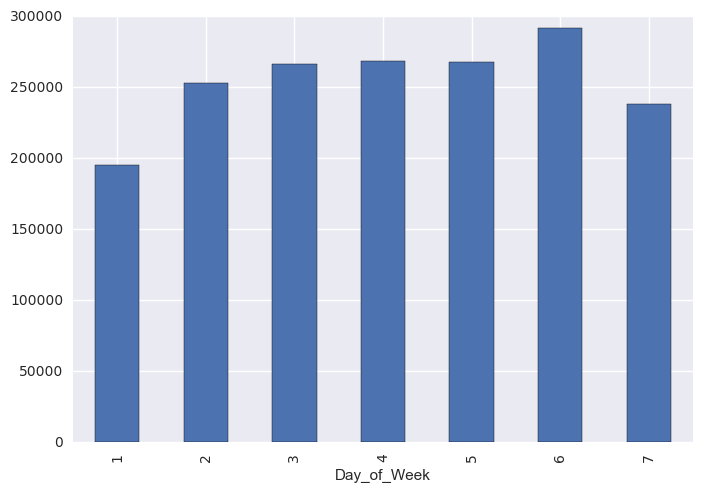

In [95]:
acc_count = acc2.groupby(acc2.Day_of_Week).Accident_Severity.count().plot(kind = 'bar')

In [ ]:
weekdend less

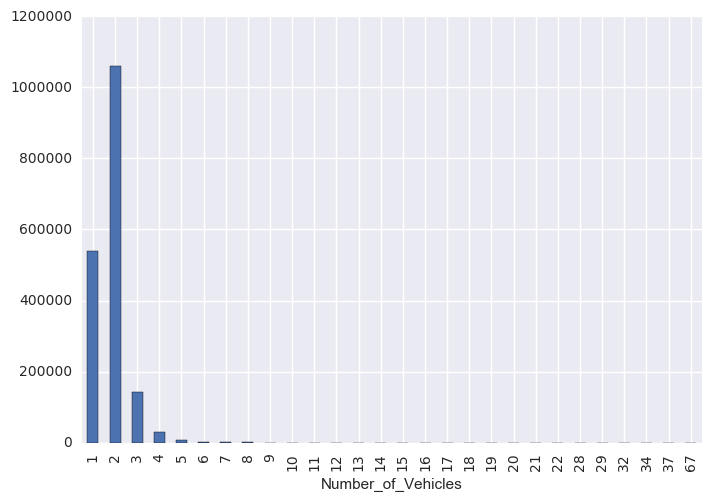

In [96]:
acc_count = acc2.groupby(acc2.Number_of_Vehicles).Accident_Severity.count().plot(kind = 'bar')

In [ ]:
#most accident caused by 1,2,3 cars

In [101]:
corrmat = acc.corr()

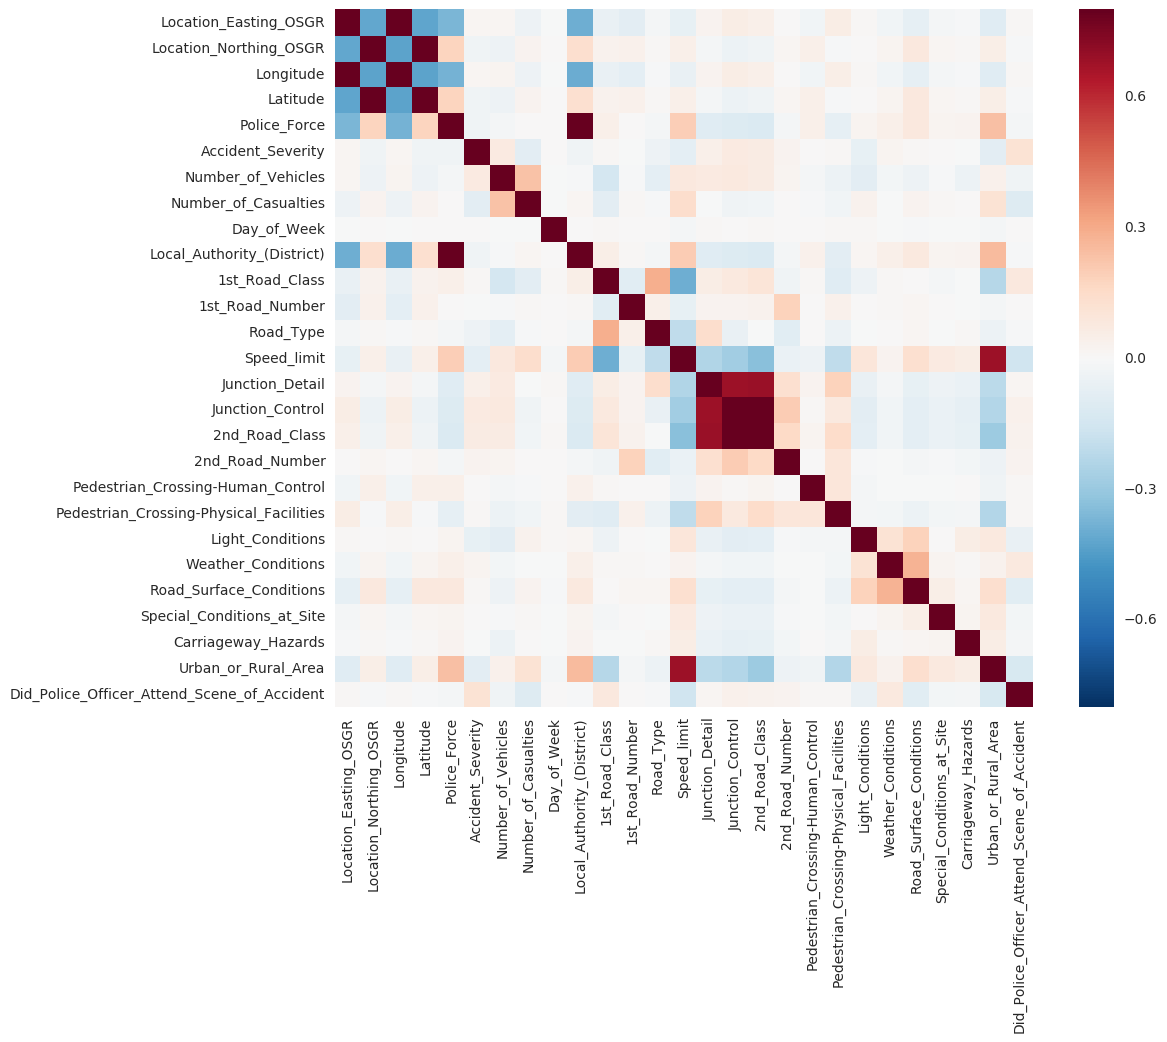

In [103]:
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax =.8,square = True);